In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import scipy
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns

In [33]:
df= pd.read_fwf("imdb_labelled.txt")
#df.columns = ['comments', 'rating']
df=df.rename(index=str, columns = {'A very, very, very slow-moving, aimless movie about a distressed, drifting young man.  \t0':'comments', 'Unnamed: 1':'feed_back'})
df=df[['comments','feed_back']]
df.head(10)

,comments,feed_back
0,Not sure who was more lost - the flat characte...,NaN
1,Attempting artiness with black & white and cle...,NaN
2,Very little music or anything to speak of. \t0,NaN
3,The best scene in the movie was when Gerardo i...,NaN
4,"The rest of the movie lacks art, charm, meanin...",NaN
5,Wasted two hours. \t0,NaN
6,Saw the movie today and thought it was a good ...,NaN
7,A bit predictable. \t0,NaN
8,Loved the casting of Jimmy Buffet as the scien...,NaN
9,And those baby owls were adorable. \t1,NaN


In [38]:
df['feed_back'] = (df['feed_back'] == 'NaN')
df.tail(15)

,comments,feed_back
984,Still it's quite interesting and entertaining ...,False
985,;) Recommend with confidence! \t1,False
986,This movie is well-balanced with comedy and dr...,False
987,It was a riot to see Hugo Weaving play a sex-o...,False
988,":) Anyway, the plot flowed smoothly and the ma...",False
989,"The opening sequence of this gem is a classic,...",False
990,Fans of the genre will be in heaven. \t1,False
991,Lange had become a great actress. \t1,False
992,It looked like a wonderful story. \t1,False
993,I never walked out of a movie faster. \t0,False


In [47]:
words = ['bad','sucked', 'lacked', 'bored','boring','terrible','tired','waste','predictable','embarassing', 'insult',]
for w in words:
    df[str(w)]= df['comments'].str.contains(' ' + str(w)+' ', case=False)

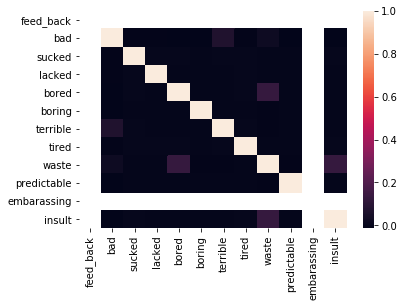

In [40]:
sns.heatmap(df.corr())

In [42]:
data = df[words]
target = df['feed_back']

In [49]:
from sklearn.naive_bayes import BernoulliNB
bnb = BernoulliNB()
bnb.fit(data,target)
y_pred=bnb.predict(data)
print("Number of mislabeled points out of a total {} points : {}".format(
    data.shape[0],
    (target != y_pred).sum()
))

Number of mislabeled points out of a total 999 points : 0


/anaconda3/envs/thinkful/lib/python3.7/site-packages/sklearn/naive_bayes.py:465: RuntimeWarning: divide by zero encountered in log
  self.class_log_prior_ = (np.log(self.class_count_) -


In [50]:
df.head(20)

,comments,feed_back,bad,sucked,lacked,bored,boring,terrible,tired,waste,predictable,embarassing,insult
0,Not sure who was more lost - the flat characte...,False,False,False,False,False,False,False,False,False,False,False,False
1,Attempting artiness with black & white and cle...,False,False,False,False,False,False,False,False,False,False,False,False
2,Very little music or anything to speak of. \t0,False,False,False,False,False,False,False,False,False,False,False,False
3,The best scene in the movie was when Gerardo i...,False,False,False,False,False,False,False,False,False,False,False,False
4,"The rest of the movie lacks art, charm, meanin...",False,False,False,False,False,False,False,False,False,False,False,False
5,Wasted two hours. \t0,False,False,False,False,False,False,False,False,False,False,False,False
6,Saw the movie today and thought it was a good ...,False,False,False,False,False,False,False,False,False,False,False,False
7,A bit predictable. \t0,False,False,False,False,False,False,False,False,False,False,False,False
8,Loved the casting of Jimmy Buffet as the scien...,False,False,False,False,False,False,False,False,False,False,False,False
9,And those baby owls were adorable. \t1,False,False,False,False,False,False,False,False,False,False,False,False


SystemError: <class 'UnicodeEncodeError'> returned a result with an error set